# Extra Trees

In [3]:
import pandas as pd
# Load the dataset
data = pd.read_csv('Data/colon-dataset-processed.csv')
# Print the first 5 rows of the data
data.head()

,Class,Age,p16540_C/C,p16540_G/C,p16540_G/G,p16580_C/C,p16580_C/T,p16580_T/T,mdm2_G/G,mdm2_G/T,mdm2_T/T,GAL3_A/A,GAL3_C/A,GAL3_C/C,TIM1_C/C,TIM1_G/C,TIM1_G/G
0,healthy,49,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False
1,healthy,49,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False
2,healthy,49,False,True,False,True,False,False,False,True,False,False,True,False,True,False,False
3,healthy,36,False,True,False,True,False,False,False,False,True,False,True,False,True,False,False
4,healthy,49,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score

# Convert 'Class' to a categorical type and then to numerical codes
data['Class'] = data['Class'].astype('category')
data['Class'] = data['Class'].cat.codes

# Create a mapping for the codes to the class names
class_name_mapping = {0: 'healthy', 1: 'diagnosed'}

# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state=42)

# Train the model
etc.fit(X_train, y_train)

# Predictions
y_pred = etc.predict(X_test)

# Evaluate the model using the original class names
accuracy = accuracy_score(y_test, y_pred)
y_test_named = y_test.map(class_name_mapping)
y_pred_named = pd.Series(y_pred).map(class_name_mapping)
classification_rep = classification_report(y_test_named, y_pred_named)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.8695652173913043
Classification Report:
              precision    recall  f1-score   support

   diagnosed       0.90      0.82      0.86        11
     healthy       0.85      0.92      0.88        12

    accuracy                           0.87        23
   macro avg       0.87      0.87      0.87        23
weighted avg       0.87      0.87      0.87        23



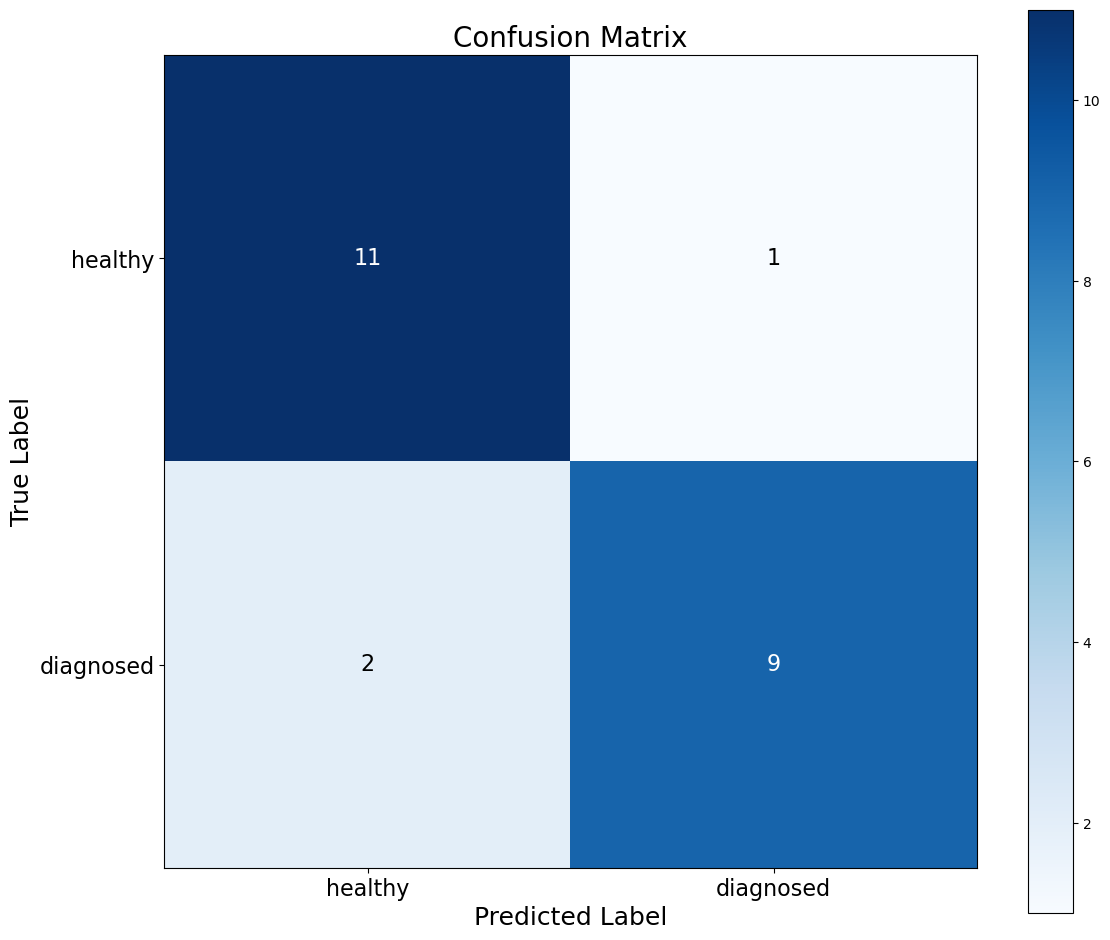

In [5]:
import  matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Enhanced confusion matrix plotting
fig, ax = plt.subplots(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)

# Display the heatmap
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Set the x and y ticks, labels, and title with increased font size
ax.set(xticks=np.arange(cm.shape[1]), 
       yticks=np.arange(cm.shape[0]),
       xticklabels=['healthy', 'diagnosed'], 
       yticklabels=['healthy', 'diagnosed'],
       title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label")
ax.title.set_fontsize(20)
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)

# Loop over data dimensions and create text annotations with increased font size
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", 
                color="white" if cm[i, j] > cm.max() / 2. else "black", fontsize=16)

plt.tight_layout()
plt.show()

# Oversample

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Convert 'Class' to a categorical type and then to numerical codes if it's not numerical
if data['Class'].dtype == 'object':
    data['Class'] = data['Class'].astype('category')
    data['Class'] = data['Class'].cat.codes

# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Oversampling
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Initialize the ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state=42, n_estimators=100, max_depth=11, criterion='gini', bootstrap=False
                           , max_features='log2')

# Train the model
etc.fit(X_train, y_train)

# Predictions
y_pred = etc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.8461538461538461
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.92      0.79      0.85        14

    accuracy                           0.85        26
   macro avg       0.85      0.85      0.85        26
weighted avg       0.86      0.85      0.85        26



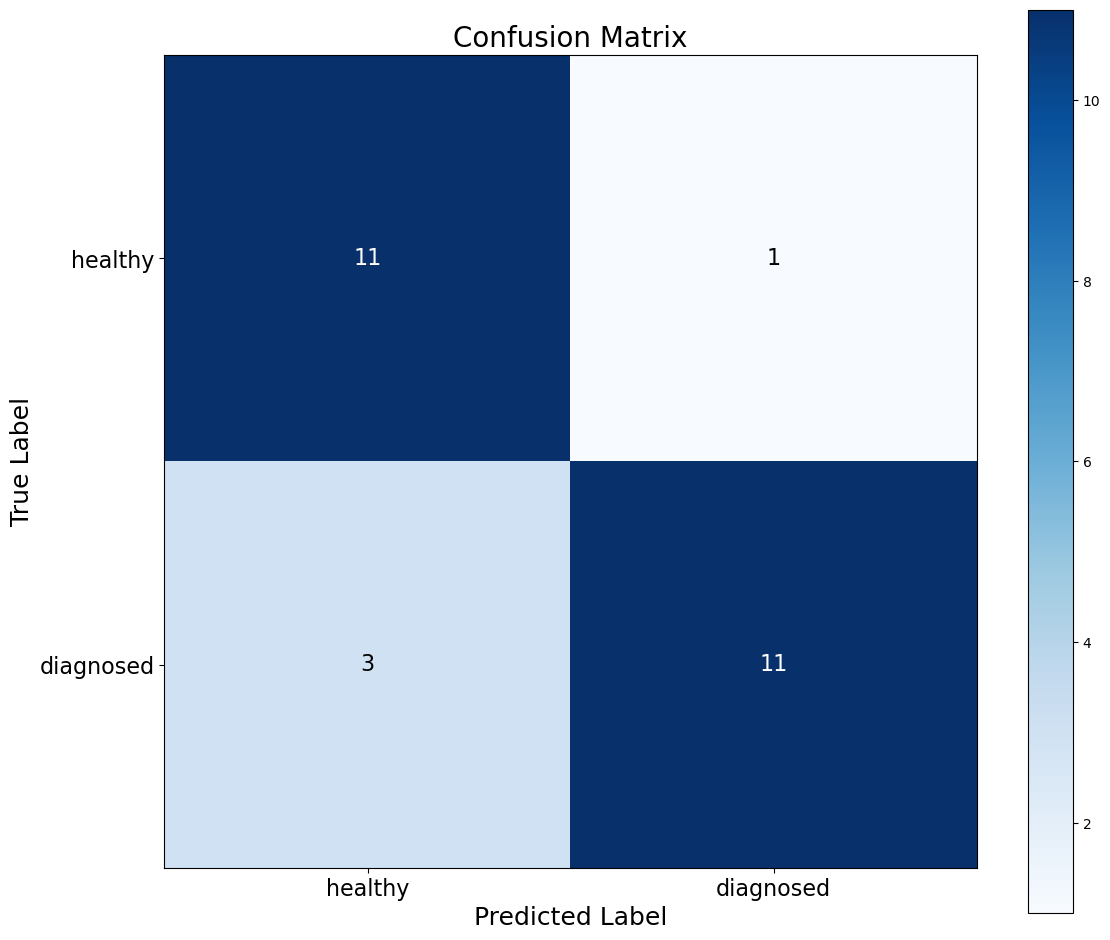

In [7]:
import  matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Enhanced confusion matrix plotting
fig, ax = plt.subplots(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)

# Display the heatmap
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Set the x and y ticks, labels, and title with increased font size
ax.set(xticks=np.arange(cm.shape[1]), 
       yticks=np.arange(cm.shape[0]),
       xticklabels=['healthy', 'diagnosed'], 
       yticklabels=['healthy', 'diagnosed'],
       title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label")
ax.title.set_fontsize(20)
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)

# Loop over data dimensions and create text annotations with increased font size
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", 
                color="white" if cm[i, j] > cm.max() / 2. else "black", fontsize=16)

plt.tight_layout()
plt.show()

# undersampel

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

# Convert 'Class' to a categorical type and then to numerical codes if it's not numerical
if data['Class'].dtype == 'object':
    data['Class'] = data['Class'].astype('category')
    data['Class'] = data['Class'].cat.codes

# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Undersampling
under_sampler = RandomUnderSampler()
X_under, y_under = under_sampler.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

# Initialize the ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state=42)

# Train the model
etc.fit(X_train, y_train)

# Predictions
y_pred = etc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.67      0.75      0.71         8

    accuracy                           0.75        20
   macro avg       0.74      0.75      0.74        20
weighted avg       0.76      0.75      0.75        20

